# Bibliotecas Utilizadas 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime, timedelta

df = pd.read_csv('classificacao_binaria_train.csv', sep=';')

df



,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1560479,4348670,2459598,Guia de solicitac?o SP/SADT,2440511.0,1,HOSPITAL,Medico ortopedista e traumatologista,NaN,NaN,...,NaN,NaN,Procedimentos,60023104,PORTE 1 (CIRURGIA PEQUENA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado
1,1120527,2905946,2459367,Guia de solicitac?o SP/SADT,2439348.0,1,PRESTADOR DE SERVICOS,Medico dermatologista,NaN,NaN,...,NaN,INDICACAO CLINICA EM ANEXO.,Procedimentos,30101298,ELETROCOAGULAC?O DE LES?ES DE PELE E MUCOSAS -...,PROCEDIMENTOS,PELE E TECIDO CELULAR SUBCUTANEO/ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
2,615210,1333736,2459091,Guia de solicitac?o internac?o,2443536.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,B342,Paciente positivo para COVID 19 ha 10 dias com...,Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Autorizado
3,1340515,3648137,2459482,Guia de solicitac?o SP/SADT,2429575.0,1,CLINICA,Medico cardiologista,NaN,NaN,...,I10,NaN,Procedimentos,40302318,"POTASSIO, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
4,1135757,897098,2459375,Guia de solicitac?o SP/SADT,2439815.0,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,M16,DOR CRONICA NO QUADRIL E COLUNA LOMBAR,MAT/MED,37765,NAUSEDRON 2 MG/ML SOL INJ CX 50 AMP VD INC X 2...,ANTIEMETICOS E ANTINAUSEANTES,"SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SIST...",Brasindice,1.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413261,921592,2265626,2459259,Guia de solicitac?o SP/SADT,2437804.0,1,MEDICO,Medico oftalmologista,Primeira consulta,NaN,...,H40,h40 glaucoma,Procedimentos,41301250,MAPEAMENTO DE RETINA (OFTALMOSCOPIA INDIRETA) ...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado
413262,608870,1313415,2459089,Guia de solicitac?o SP/SADT,2440041.0,1,CLINICA,Medico oftalmologista,NaN,NaN,...,NaN,NaN,Procedimentos,41301439,FUNDOSCOPIA SOB MEDRIASES - BINOCULAR,PROCEDIMENTOS,TESTES PARA DIAGNOSTICO,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
413263,1489829,4129003,2459557,Guia de solicitac?o de prorrogac?o de internac?o,2438718.0,1,HOSPITAL,Medico cirurgi?o geral,NaN,NaN,...,NaN,paciente com metastase de sarcona \nData da en...,Procedimentos,60033711,TAXA DE OBSERVAC?O DE DE 6 A 12 HORAS,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
413264,690055,1570248,2459136,Guia de solicitac?o SP/SADT,2440704.0,1,CLINICA,Medico clinico,Primeira consulta,NaN,...,H40,GLAUCOMA,Procedimentos,41501144,PCT-COMP - TOMOGRAFIA DE COERENCIA OPTICA - MO...,TOMOGRAFIA COMPUTADORIZADA DIAGNOSTICA,TOMOGRAFIA COMPUTADORIZADA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado


# Compreensão do Negócio 💼

### Conceitos iniciais
*Operadora*: Empresa habilitada a comercializar planos de saúde, com o objetivo de intermediar o acesso a serviços assistenciais.

*Prestador*: Empresa ou pessoa que a operadora contrata para prestar assistência em saúde para os seus clientes.

*Beneficiário*: Pessoa física que contrata a operadora (cliente final).

##### **Contexto**

O principal objetivo da operadora é controlar os gastos gerados pelos beneficiários, garantindo que eles realizem apenas os procedimentos contratualizados e que sejam pertinentes para a manutenção da saúde. Para isso, a operadora exige que todos os atos assistenciais sejam previamente autorizados.

##### **Em resumo**

O prestador questiona a operadora se o beneficiário está apto a realizar o procedimento. O atendimento só deve continuar se a resposta for positiva.
Todas as solicitações são analisadas pelo sistema informatizado da operadora. Após a análise automática, o sistema define se já consegue dar a resposta final (sim ou não) ou depende da análise de um auditor (funcionário da operadora).
Os auditores analisam todos os artefatos da requisição (justificativa, anexos, histórico do beneficiário etc.) e respondem se o procedimento está autorizado ou não.

##### **Problema**

Os auditores são profissionais especializados (médicos e enfermeiros) que geram custos elevados para a operadora. Quanto maior o número de requisições encaminhadas para auditoria, maior será o gasto administrativo.
Os sistemas atuais se limitam a analisar as regras parametrizadas (se/então), não conseguem analisar o comportamento dos auditores para prever desfechos prováveis.

##### **Desejo de solução**

Ferramenta capaz de combinar todas as variáveis de uma requisição e, baseada no comportamento histórico dos auditores, consiga automatizar a análise da solicitação.

# Compreensão dos Dados 🎲


 A seguir está uma breve descrição das informações contidas nessa base de dados:


| Coluna                       | Descrição                                                                                                    | DataType |
|------------------------------|-------------------------------------------------------------------------------------------------------------|----------|
| NR_SEQ_REQUISICAO            | É o número da requisição. Pode repetir pois uma requisição é igual para todo o tratamento...                 | int64    |
| NR_SEQ_ITEM                  | É o número do item. Não pode repetir, portanto, é uma chave candidata.                                       | int64    |
| DT_REQUISICAO                | É a data em que a requisição foi feita. Está PROVAVELMENTE em formato Julian Day                                    | int64    |
| DS_TIPO_GUIA                 | Descrição do tipo de guia. A seguir são os tipos:<br>SP/SADT → Exames e Terapias<br>Internação → Cirurgias ou internações clínicas<br>Prorrogação → Complemento da Internação | object   |
| DT_NASCIMENTO                | É a data de nascimento do paciente. Está PROVAVELMENTE em formato Julian Day                   | float64  |
| NR_PRODUTO                   | É presumido que seja o número do produto, porém todos os valores correspondem a 1.                           | float64  |
| DS_TIPO_PREST_SOLICITANTE    | Classificação do prestador. Possíveis valores incluem: Hospital, Clínica, Consultório, entre outros          | object   |
| DS_CBO                       | Código Brasileiro de Ocupações do solicitante.                                                              | object   |
| DS_TIPO_CONSULTA             | Tipo da consulta. Os possíveis valores são: Primeira consulta, retorno ou encaminhamento.                   | object   |
| QT_TEMPO_DOENCA              | Campo numérico que relata o tempo em que o paciente possui a doença.                                       | float64  |
| DS_UNIDADE_TEMPO_DOENCA      | Informa se o número do campo numérico de QT_TEMPO_DOENCA está em dias, meses ou anos.                       | object   |
| DS_TIPO_DOENCA               | Informa se a doença é aguda ou crônica. Todos os possíveis valores são: aguda ou crônica                    | object   |
| DS_INDICACAO_ACIDENTE        | Relata o tipo de acidente. Todos os possíveis valores são: Acidente de trabalho, trânsito, outros ou não acidente. | object   |
| DS_TIPO_SAIDA                | É o provável desfecho do atendimento: Todos os possíveis valores são: Retorno, Internação ou Alta...        | float64  |
| DS_TIPO_INTERNACAO           | O tipo da internação. Valores possíveis são: Clínica, Obstetrica, entre outros.                             | object   |
| DS_REGIME_INTERNACAO         | O local da internação do paciente. Valores possíveis são: Hospitalar, Hospital-dia, Domiciliar.             | object   |
| DS_CARACTER_ATENDIMENTO      | Define o caráter do atendimento, todos os possíveis valores são: Urgencia/Emergencia ou Eletiva.            | object   |
| DS_TIPO_ACOMODACAO           | É o tipo da acomodação. Todos os possíveis valores são: Enfermaria, Apartamento ou UTI.                    | object   |
| QT_DIA_SOLICITADO            | Quantidade de dias solicitado para o atendimento.                                                          | float64  |
| CD_GUIA_REFERENCIA           | É o código do guia referenciando o CID                                                                     | float64  |
| DS_TIPO_ATENDIMENTO          | Descrição do tipo de atendimento da guia SADT.                                                             | object   |
| CD_CID                       | É o código internacional da doença, que pode explicar o que ocasionou a solicitação.                       | object   |
| DS_INDICAÇÃO_CLINICA         | É o texto descrevendo a situação do paciente, o motivo da solicitação e pode explicar o motivo da recomendação do item prescrito. | object   |
| DS_TIPO_ITEM                 | É o tipo do item.                                                                                           | object   |
| CD_ITEM                      | O código único do item. Dependendo do tipo do item, vários códigos são usados um atrás do outro para cada ação realizada. | float64  |
| DS_ITEM                      | É o nome descritivo do item.                                                                               | object   |
| DS_CLASSE                    | É uma descrição mais específica do DS_SUBGRUPO, e descreve de qual área da medicina o DS_ITEM pertence.     | object   |
| DS_SUBGRUPO                  | É uma descrição branda do que o item pode ser categorizado.                                                | object   |
| DS_GRUPO                     | É o grupo que fornece o item solicitado.                                                                   | object   |
| QT_SOLICITADA                | Quantidade do item solicitado.                                                                             | float64  |
| DS_STATUS_ITEM               | Status do item, todos os possíveis valores são: Autorizado, Negado.                  | object   |


# Análise Exploratória 📊

#### Códigos Bases do começo de toda análise exploratória


In [2]:
# Dimensão da base de dados
df.shape

(413266, 31)

In [3]:
# Tipos dos atributos
df.dtypes

NR_SEQ_REQUISICAO              int64
NR_SEQ_ITEM                    int64
DT_REQUISICAO                  int64
DS_TIPO_GUIA                  object
DT_NASCIMENTO                float64
NR_PRODUTO                     int64
DS_TIPO_PREST_SOLICITANTE     object
DS_CBO                        object
DS_TIPO_CONSULTA              object
QT_TEMPO_DOENCA              float64
DS_UNIDADE_TEMPO_DOENCA       object
DS_TIPO_DOENCA                object
DS_INDICACAO_ACIDENTE         object
DS_TIPO_SAIDA                float64
DS_TIPO_INTERNACAO            object
DS_REGIME_INTERNACAO          object
DS_CARATER_ATENDIMENTO        object
DS_TIPO_ACOMODACAO            object
QT_DIA_SOLICITADO            float64
CD_GUIA_REFERENCIA           float64
DS_TIPO_ATENDIMENTO           object
CD_CID                        object
DS_INDICACAO_CLINICA          object
DS_TIPO_ITEM                  object
CD_ITEM                        int64
DS_ITEM                       object
DS_CLASSE                     object
D

In [4]:
# Separação dos atributos por tipo
features_cat = df.select_dtypes(include=['object']).columns.tolist()
print(f'Atributos categóricos = {features_cat}')
features_num = df.select_dtypes(exclude=['object']).columns.tolist()
print(f'Atributos numéricos = {features_num}')

Atributos categóricos = ['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO', 'DS_TIPO_CONSULTA', 'DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_DOENCA', 'DS_INDICACAO_ACIDENTE', 'DS_TIPO_INTERNACAO', 'DS_REGIME_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'DS_TIPO_ATENDIMENTO', 'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_ITEM', 'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'DS_STATUS_ITEM']
Atributos numéricos = ['NR_SEQ_REQUISICAO', 'NR_SEQ_ITEM', 'DT_REQUISICAO', 'DT_NASCIMENTO', 'NR_PRODUTO', 'QT_TEMPO_DOENCA', 'DS_TIPO_SAIDA', 'QT_DIA_SOLICITADO', 'CD_GUIA_REFERENCIA', 'CD_ITEM', 'QT_SOLICITADA']


In [5]:
# Valores únicos dos atributos categóricos
for feature in features_cat:
  print(f'{feature} = {df[feature].unique()}')

DS_TIPO_GUIA = ['Guia de solicitac?o SP/SADT' 'Guia de solicitac?o internac?o'
 'Guia de solicitac?o de prorrogac?o de internac?o']
DS_TIPO_PREST_SOLICITANTE = ['HOSPITAL' 'PRESTADOR DE SERVICOS' 'CLINICA' 'CLINICA DE IMAGEM'
 'LABORATORIO' 'CLINICA DE RADIOLOGIA' 'UTI' 'CLINICA  DE UROLOGIA'
 'MEDICO' 'HOME CARE' 'INTERCAMBIO' 'COOPERATIVA']
DS_CBO = ['Medico ortopedista e traumatologista ' 'Medico dermatologista '
 'Medico clinico' 'Medico cardiologista ' 'Medico oncologista clinico'
 'Medico oftalmologista' 'Medico ginecologista e obstetra '
 'Medico cirurgi?o geral ' 'Medico endocrinologista e metabologista '
 'Medico urologista ' 'Medico cirurgi?o do aparelho digestivo '
 'Medico otorrinolaringologista ' 'Medico cancerologista cirurgico'
 'Medico Mastologista' 'Medico  neurocirurgi?o'
 'Medico em medicina intensiva ' 'Medico radioterapeuta '
 'Medico em cirurgia vascular'
 'Cirurgi?o dentista - traumatologista bucomaxilofacial '
 'Medico pediatra' 'Medico em endoscopia ' 'Medico a

In [6]:
# Estatística descritiva dos atributos numéricos
df.describe().round(2)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DT_NASCIMENTO,NR_PRODUTO,QT_TEMPO_DOENCA,DS_TIPO_SAIDA,QT_DIA_SOLICITADO,CD_GUIA_REFERENCIA,CD_ITEM,QT_SOLICITADA
count,413266.00,413266.00,413266.00,413256.00,413266.0,303.00,0.0,120850.00,70526.00,4.132660e+05,413266.00
mean,1151040.40,2624415.57,2459381.02,2439554.68,1.0,8.31,NaN,2.42,1181369.05,5.932827e+07,58.92
std,288987.82,1179940.95,153.32,6859.11,0.0,8.08,NaN,3.57,249634.12,2.182055e+08,4115.49
min,579632.00,823127.00,2459075.00,2421816.00,1.0,1.00,NaN,0.00,579703.00,4.200000e+01,1.00
25%,929271.75,1466847.25,2459264.00,2434627.00,1.0,3.00,NaN,1.00,994343.00,2.020305e+07,1.00
50%,1188201.00,2752145.50,2459402.00,2438894.00,1.0,5.00,NaN,1.00,1189774.00,4.060117e+07,1.00
75%,1385722.00,3658568.50,2459506.00,2443453.00,1.0,11.00,NaN,3.00,1398012.00,4.140140e+07,2.00
max,1614655.00,4525740.00,2459622.00,2459533.00,1.0,47.00,NaN,55.00,1613675.00,3.000079e+09,600343.00


In [7]:
# Detecção de valores duplicados
df[df.duplicated()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM


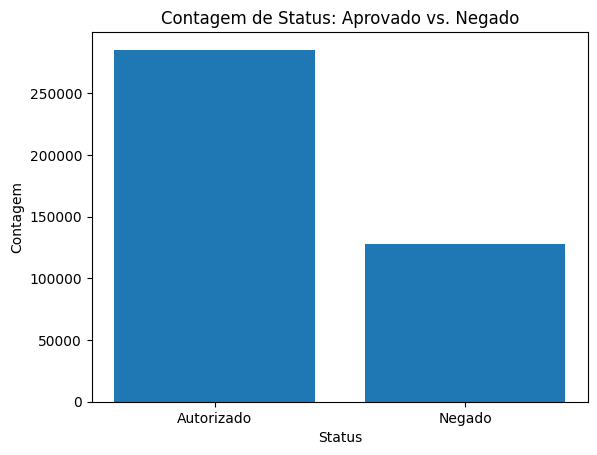

In [8]:
# Vamos olhar um pouco para os resultados da coluna target (DS_STATUS_ITEM):

# Contagem de ocorrências de 'Aprovado' e 'Negado'
status_counts = df['DS_STATUS_ITEM'].value_counts()

# Criar o gráfico de barras
plt.bar(status_counts.index, status_counts.values)

# Adicionar rótulos aos eixos
plt.xlabel('Status')
plt.ylabel('Contagem')

# Adicionar título ao gráfico
plt.title('Contagem de Status: Aprovado vs. Negado')

# Mostrar o gráfico
plt.show()


Observamos que está bem desbalanceado os dados. Isso precisará ser corrigido futuramente.

In [9]:
# Detecção de dados faltantes
df.isnull().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                    10
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_TIPO_CONSULTA             397642
QT_TEMPO_DOENCA              412963
DS_UNIDADE_TEMPO_DOENCA      412962
DS_TIPO_DOENCA               412296
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413266
DS_TIPO_INTERNACAO           291222
DS_REGIME_INTERNACAO         291222
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291303
QT_DIA_SOLICITADO            292416
CD_GUIA_REFERENCIA           342740
DS_TIPO_ATENDIMENTO          121341
CD_CID                       235294
DS_INDICACAO_CLINICA          87535
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                 

#### Aqui observamos um coisa interessante, na saída a cima vemos que:

QT_TEMPO_DOENCA → 412963 <br> <br> DS_UNIDADE_TEMPO_DOENCA → 412962 

A difença deles (412963 - 412962) = 1, então vamos descobrir quem é esse "Outlier" com o código a baixo:


In [10]:
# Encontre os índices onde a diferença ocorre
indices_diff = df[(df['QT_TEMPO_DOENCA'].notnull() & df['DS_UNIDADE_TEMPO_DOENCA'].isnull()) | (df['QT_TEMPO_DOENCA'].isnull() & df['DS_UNIDADE_TEMPO_DOENCA'].notnull())].index

# Imprima as linhas onde a diferença ocorre
for index in indices_diff:
    print(df.loc[index])




NR_SEQ_REQUISICAO                                                      1566751
NR_SEQ_ITEM                                                            4368894
DT_REQUISICAO                                                          2459600
DS_TIPO_GUIA                                    Guia de solicitac?o internac?o
DT_NASCIMENTO                                                        2454779.0
NR_PRODUTO                                                                   1
DS_TIPO_PREST_SOLICITANTE                                             HOSPITAL
DS_CBO                                                          Medico clinico
DS_TIPO_CONSULTA                                                           NaN
QT_TEMPO_DOENCA                                                            NaN
DS_UNIDADE_TEMPO_DOENCA                                                   Dias
DS_TIPO_DOENCA                                                             NaN
DS_INDICACAO_ACIDENTE                               

##### Descobrimos que é a linha de número 168835, e em cima temos as informações dela.

Uma coisa interessante é que na coluna de DS_INDICACAO_CLINICA temos um texto, que informa a idade do paciente, que é 13 anos.

Isso pode nos ajudar a cruzar algumas informações, como:

Quando olhamos o dataset no geral, la no começo do codigo, observamos que haviam relatos de covid, e levando em consideração que a covid começou no Brasil em 2020, e que a pessoa tem 13 anos **no momento em que ela fez a consulta**, podemos estimar que esse dataset está em entre (2020 ~ 2023), portanto se nossa Data Juliana está correta, ela deverá cair nesse intervalo Gregoriano, tanto em DT_NASCIMENTO (2007 ~ 2010) quanto em DT_REQUISICAO (2020 ~ 2023) para esse respectivo paciente.

#### Aproveitando a ideia de cima, que tal procurarmos por mais pessoas que aparecem a idade na coluna DS_INDICACAO_CLINICA? 

Vamos pesquisar pela palavra "anos" e ver o que acontece:

In [11]:
# Filtrando as linhas onde a palavra 'anos' aparece na coluna 'DS_INDICACAO_CLINICA'
filtered_series = df.loc[df['DS_INDICACAO_CLINICA'].str.contains('anos', na=False), 'DS_INDICACAO_CLINICA']

# Mostrando a série filtrada
print(filtered_series)# Filtrando as linhas onde a palavra 'anos' aparece na coluna 'DS_INDICACAO_CLINICA'
filtered_df = df[df['DS_INDICACAO_CLINICA'].str.contains('anos', na=False)]

# Mostrando o DataFrame filtrado
print(filtered_df)


49        paciente 69 anos, com avc + hemorragia . esta ...
80        paciente idosa com anos  aneurica  apresentand...
112       Paciente 62 anos, covid + apresenta piora do q...
143       Paciente 77 anos, DRC nao dialitica (acompanha...
205       Paciente, 74 anos, diabetica, hipertensa, idos...
                                ...                        
413178    Paciente 75 anos, diabetico hipertenso apresen...
413203    Paciente idosa, 67 anos, com COVID19 positivo....
413204    Paciente 43 anos, G2PEc + LTB, RNM da pelve ev...
413222    Paciente 91 anos com queixa de tosse, febre e ...
413224    Paciente idoso, 66 anos, com COVID-19 positivo...
Name: DS_INDICACAO_CLINICA, Length: 12382, dtype: object
        NR_SEQ_REQUISICAO  NR_SEQ_ITEM  DT_REQUISICAO  \
49                1327432      3604403        2459475   
80                1185466      3125028        2459401   
112                985870      2466777        2459296   
143               1557805      4339789        2459597  

##### Olhando a saida, percebemos que como existem muitos dados disponiveis a respeito das idades, podemos confirmar se realmente as nossas datas estão em formato Julian Day, dessa forma:

Tirando a diferença da ( DT_RDT_REQUISICAO - DT_NASCIMENTO ) e comparando com a idade que aparece na coluna DS_INDICACAO_CLINICA.

Caso as idades batam, podemos confirmar que as datas estão em formato Julian Day.

### Explorando a coluna de DS_INDICAO_CLINICA observamos e tambem o seguinte paciente:

In [12]:
#procurar na coluna DS_INDICACAO_CLINICA a palavra '(BURRO)'
filtered_df = df[df['DS_INDICACAO_CLINICA'].str.contains('BURRO', na=False)]
filtered_df

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
9973,1195132,3153828,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40302318,"POTASSIO, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
62195,1195132,3153834,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,41001095,TC - TOMOGRAFIA COMPUTADORIZADA -ABDOME TOTAL ...,TOMOGRAFIA COMPUTADORIZADA DIAGNOSTICA,TOMOGRAFIA COMPUTADORIZADA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
101545,1195132,3153832,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40803082,RX - RADIOGRAFIA - BRACO,ESQUELETO TORACICO E MEMBROS SUPERIORES,METODOS DIAGNOSTICOS POR IMAGEM,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
152216,1198231,3164154,2459408,Guia de solicitac?o de prorrogac?o de internac?o,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,T149,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,41001109,TC - TOMOGRAFIA COMPUTADORIZADA -ABDOME SUPERIOR,TOMOGRAFIA COMPUTADORIZADA DIAGNOSTICA,TOMOGRAFIA COMPUTADORIZADA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado
235707,1197013,3159756,2459405,Guia de solicitac?o de prorrogac?o de internac?o,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,T149,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,4.0,Autorizado
267623,1195132,3153827,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40301630,"CREATININA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
277581,1195132,3153831,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40304361,HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAC?ES...,HEMATOLOGIA LABORATORIAL,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
324597,1195132,3153833,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40803090,RX - RADIOGRAFIA - COTOVELO,ESQUELETO TORACICO E MEMBROS SUPERIORES,METODOS DIAGNOSTICOS POR IMAGEM,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
339004,1197013,3159753,2459405,Guia de solicitac?o de prorrogac?o de internac?o,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,T149,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,60000783,ENFERMARIA,DIARIAS,DIARIAS,DIARIAS,4.0,Autorizado
404303,1195132,3153830,2459404,Guia de solicitac?o SP/SADT,2438636.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"PACIENTE PROVENIENTE DE NAZARE-TO, VEM REFERIN...",Procedimentos,40302580,"UREIA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado


In [13]:
filtered_df = df[df['DS_INDICACAO_CLINICA'].str.contains('13 anos com vomitos', na=False)]
filtered_df

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
123697,1570870,4382209,2459602,Guia de solicitac?o internac?o,2454685.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"Paciente 13 anos com vomitos, astenia, desidra...",Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,3.0,Autorizado
402746,1570870,4382210,2459602,Guia de solicitac?o internac?o,2454685.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,NaN,"Paciente 13 anos com vomitos, astenia, desidra...",Procedimentos,60000783,ENFERMARIA,DIARIAS,DIARIAS,DIARIAS,3.0,Autorizado


# Preparação dos Dados 🧼

| Coluna                       | O que podemos fazer?                                                                                                                                                            
|------------------------------|-------------------------------------------------------------------------------------------------------------
| NR_SEQ_REQUISICAO            | Não parece algo importante para passar ao modelo afinal é apenas um numero que identifica a requisição.                
| NR_SEQ_ITEM                  | Mesma coisa da coluna de cima.                                   
| DT_REQUISICAO                | Transformar para o formato gregoriano (YYYY-MM-DD)                                  
| DS_TIPO_GUIA                 | Os tipos:<br>SP/SADT → Exames e Terapias<br>Internação → Cirurgias ou internações clínicas<br>Prorrogação → Complemento da Internação , <br> <br> criar 3 colunas para que levam 0 ou 1
| DT_NASCIMENTO                | Transformar para o formato gregoriano (YYYY-MM-DD)                   
| NR_PRODUTO                   | **PRECISA ANALISAR**                         
| DS_TIPO_PREST_SOLICITANTE    | **PRECISA ANALISAR**                
| DS_CBO                       | **PRECISA ANALISAR**                                                               
| DS_TIPO_CONSULTA             | **PRECISA ANALISAR**                       
| QT_TEMPO_DOENCA              | **PRECISA ANALISAR JUNTO A COLUNA DS_UNIDADE_TEMPO_DOENÇA**                                           
| DS_UNIDADE_TEMPO_DOENCA      | Padronizar com a coluna de tempo de doença, para que fique apenas em dias, meses ou anos.                  
| DS_TIPO_DOENCA               | One-Hot Encoding: Aguda (0) ou crônica (1)                  
| DS_INDICACAO_ACIDENTE        | One-Hot Encoding: Não acidente (0) Acidente (1)      
| DS_TIPO_SAIDA                |  **PRECISA ANALISAR**        
| DS_TIPO_INTERNACAO           |  **PRECISA ANALISAR**                             
| DS_REGIME_INTERNACAO         |  **PRECISA ANALISAR**           
| DS_CARACTER_ATENDIMENTO      | One-Hot Encoding: Eletiva (0) Urgencia/Emergencia (1)            
| DS_TIPO_ACOMODACAO           | **PRECISA ANALISAR MAS PROVAVEL One-Hot Encoding COM ADD DE COLUNAS**                    
| QT_DIA_SOLICITADO            | **PRECISA ANALISAR**                                                         
| CD_GUIA_REFERENCIA           | **PRECISA ANALISAR**                                                                    
| DS_TIPO_ATENDIMENTO          | **PRECISA ANALISAR**                                                             
| CD_CID                       | **PRECISA ANALISAR, PRECISA ANALISAR MUITO! Vale a pena classificar em gravidade? Eliminar? ou outra coisa?**                     
| DS_INDICAÇÃO_CLINICA         | Não é uma coluna relevante para o modelo mas é uma coluna relevante para exploração e tratamento de dados! 
| DS_TIPO_ITEM                 | **PRECISA ANALISAR (como assim?)**                                                                                         
| CD_ITEM                      | **PRECISA ANALISAR (como assim?)** 
| DS_ITEM                      | **PRECISA ANALISAR (como assim?)**                                                                              
| DS_CLASSE                    | **PRECISA ANALISAR (como assim?)**    
| DS_SUBGRUPO                  | **PRECISA ANALISAR (como assim?)**                                                
| DS_GRUPO                     | **PRECISA ANALISAR (como assim?)**                                                                  
| QT_SOLICITADA                | **PRECISA ANALISAR**                                                                            
| DS_STATUS_ITEM               | One-Hot Encoding: Negado (0) ou Autorizado (1)                  


In [14]:
# Função para converter a data de Julian Day para Gregoriana
def julian_to_gregorian(julian_day):
    # Constante para converter Julian Day para data Gregoriana
    JULIAN_TO_GREGORIAN = 1721425.5
    
    # Verificando se o valor é NaN e, neste caso, retornando NaN
    if np.isnan(julian_day):
        return np.nan
    
    # Calculando a data Gregoriana
    gregorian_date = datetime.fromordinal(int(julian_day - JULIAN_TO_GREGORIAN))
    
    # Formatando a data para ANO-MÊS-DIA
    formatted_date = gregorian_date.strftime('%Y-%m-%d')
    
    return formatted_date

In [15]:
df['DATA_NASCIMENTO_GREGORIANA'] = df['DT_NASCIMENTO'].apply(julian_to_gregorian)
df['DATA_REQUISICAO_GREGORIANA'] = df['DT_REQUISICAO'].apply(julian_to_gregorian)



In [16]:
df['DATA_REQUISICAO_GREGORIANA'] = pd.to_datetime(df['DATA_REQUISICAO_GREGORIANA'])
df['DATA_NASCIMENTO_GREGORIANA'] = pd.to_datetime(df['DATA_NASCIMENTO_GREGORIANA'])


In [17]:
#Visualizar as linhas em que pelo menos uma das colunas 'DT_NASCIMENTO' ou 'DT_REQUISICAO' tem valores nulos
linhas_com_valores_nulos = df.loc[(df['DT_NASCIMENTO'].isnull()) | (df['DT_REQUISICAO'].isnull())]

# Agora você pode imprimir ou trabalhar com as linhas que contêm valores nulos em pelo menos uma das colunas
linhas_com_valores_nulos



,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM,DATA_NASCIMENTO_GREGORIANA,DATA_REQUISICAO_GREGORIANA
83452,922781,2269867,2459261,Guia de solicitac?o SP/SADT,NaN,1,CLINICA DE IMAGEM,Medico ortopedista e traumatologista,NaN,NaN,...,Procedimentos,30713137,PUNCAO ARTICULAR DIAGNOSTICA OU TERAPEUTICA (I...,OUTROS PROCEDIMENTOS / PUNC?ES,SISTEMA MUSCULO-ESQUELETICO E ARTICULAC?ES,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado,NaT,2021-02-14
85197,922659,2269637,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,Procedimentos,30101077,"BIOPSIA DE PELE, TUMORES SUPERFICIAIS, TECIDO ...",PROCEDIMENTOS,PELE E TECIDO CELULAR SUBCUTANEO/ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado,NaT,2021-02-14
92213,902727,2208646,2459250,Guia de solicitac?o SP/SADT,NaN,1,CLINICA DE IMAGEM,Medico ortopedista e traumatologista,NaN,NaN,...,Procedimentos,41101316,RM - RESSONANCIA MAGNETICA - ARTICULAR (POR AR...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado,NaT,2021-02-03
103329,939702,873384,2459269,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,MAT/MED,144669,SYNVISC ONE SER.6ML - SER,Protese,Material Hospitalar,Simpro,1.0,Autorizado,NaT,2021-02-22
130482,1018779,2568132,2459314,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,Primeira consulta,NaN,...,Procedimentos,60023384,TAXA DE SALA DE PROCEDIMENTO AMBULATORIAL,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado,NaT,2021-04-08
144245,938556,2316968,2459269,Guia de solicitac?o de prorrogac?o de internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,Procedimentos,60026227,TAXA DE USO DE BISTURI ELETRONICO MICROPROCESS...,TAXA DE USO DE EQUIPAMENTO,TAXA DE USO DE EQUIPAMENTO,TAXAS,1.0,Negado,NaT,2021-02-22
196795,922659,2269647,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,Procedimentos,60033711,TAXA DE OBSERVAC?O DE DE 6 A 12 HORAS,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado,NaT,2021-02-14
237152,922659,2269850,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,Procedimentos,60023104,PORTE 1 (CIRURGIA PEQUENA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado,NaT,2021-02-14
281314,939702,2319943,2459269,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,Procedimentos,30713137,PUNCAO ARTICULAR DIAGNOSTICA OU TERAPEUTICA (I...,OUTROS PROCEDIMENTOS / PUNC?ES,SISTEMA MUSCULO-ESQUELETICO E ARTICULAC?ES,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado,NaT,2021-02-22
398941,1017273,2563293,2459313,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,Primeira consulta,NaN,...,Procedimentos,60023384,TAXA DE SALA DE PROCEDIMENTO AMBULATORIAL,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado,NaT,2021-04-07


In [18]:
#Excluindo os valores nulos da coluna DT_NASCIMENTO 
df.dropna(subset=['DT_NASCIMENTO'], inplace=True)



In [19]:
df['Idade'] = df['DATA_REQUISICAO_GREGORIANA'] - df['DATA_NASCIMENTO_GREGORIANA']

#dividir tudo em df idade por 365
df['Idade'] = (df['Idade'] / timedelta(days=365)).round(0)
df['Idade'] = df['Idade'].astype(int)
df['Idade']




0         52
1         55
2         43
3         82
4         54
          ..
413261    59
413262    52
413263    57
413264    50
413265    48
Name: Idade, Length: 413256, dtype: int64

Vamos analisar como está a distribuição da Idade:

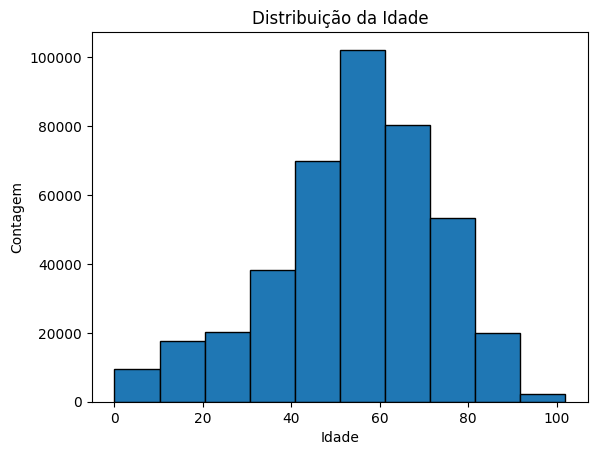

In [20]:
# Vamos plotar o histograma da coluna 'Idade'
plt.hist(df['Idade'], bins=10, edgecolor='k')  # 'bins' define o número de barras no histograma

# Adicione rótulos aos eixos x e y, bem como um título ao gráfico
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição da Idade')

# Exiba o gráfico
plt.show()

Observando a distribuição normal, é legal utilizar um Scaler padrão, para normalização da idade.

In [21]:
percentil_05 = df['QT_DIA_SOLICITADO'].quantile(0.05)
percentil_95 = df['QT_DIA_SOLICITADO'].quantile(0.95)

# Encontre o intervalo entre esses percentis
intervalo_majoritario = (percentil_05, percentil_95)

print(f"Intervalo da maioria dos dados: {intervalo_majoritario}")

Intervalo da maioria dos dados: (0.0, 9.0)


### Observamos que existem muitos dados onde a doença não foi preenchida com o codigo (CD_CID), vamos tentar melhorar isso, buscando essa informação na coluna (DS_INDICAO_CLINICA).

In [22]:
# 1. Obter valores únicos de códigos de doença
codigos_doenca = df['CD_CID'].dropna().unique()

# 2. Identificar linhas com `CD_CID` vazio
linhas_vazias = df['CD_CID'].isnull()

# 3. Procurar códigos de doença na descrição clínica, preencher `CD_CID` e imprimir linhas correspondentes
for codigo in codigos_doenca:
    condicao = df['DS_INDICACAO_CLINICA'].str.contains(codigo, na=False) & linhas_vazias
    linhas_correspondentes = df[condicao]
        
    df.loc[condicao, 'CD_CID'] = codigo


Agora, df deve ter `CD_CID` preenchido com códigos encontrados em `DS_INDICACAO_CLINICA`

In [23]:
#Vamos verificar quanto reduziu na coluna CD_CID os valores nulos:
df['CD_CID'].isnull().sum()

230934

235294 - 230934 = **4360** , tivemos um aumento de 4360 dados preenchidos, o que é muito bom.

In [24]:
codigos_doenca = df['CD_CID'].unique()
#contar a quantida de codigos unicos
len(codigos_doenca)

1850

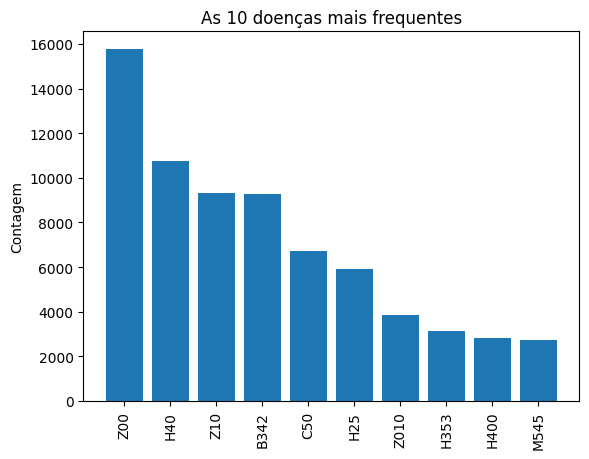

In [25]:
cid_counts = df['CD_CID'].value_counts()


num_doencas = 10  


top_doencas = cid_counts.head(num_doencas)

plt.bar(top_doencas.index, top_doencas.values)

plt.xticks(rotation=90)

plt.ylabel('Contagem')
plt.title('As {} doenças mais frequentes'.format(num_doencas))


plt.show()

In [26]:

fig = px.bar(x=df.columns, y=df.isnull().sum(), labels={'x':'Coluna', 'y':'Número de Valores Nulos'})
fig.update_layout(title='Valores Nulos por Coluna')
fig.show()


Vamos obsevar como estão distribuidas as negações das requisições e aprovações ao longo do tempo:

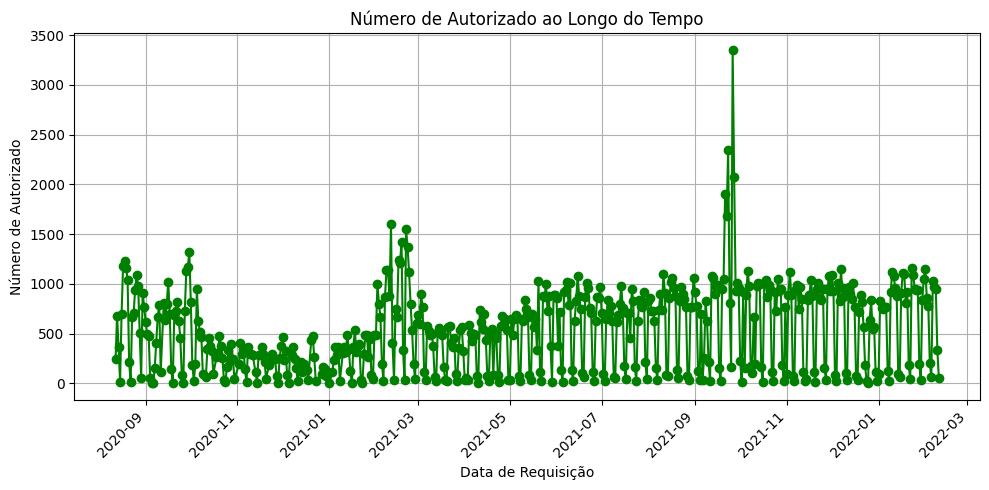

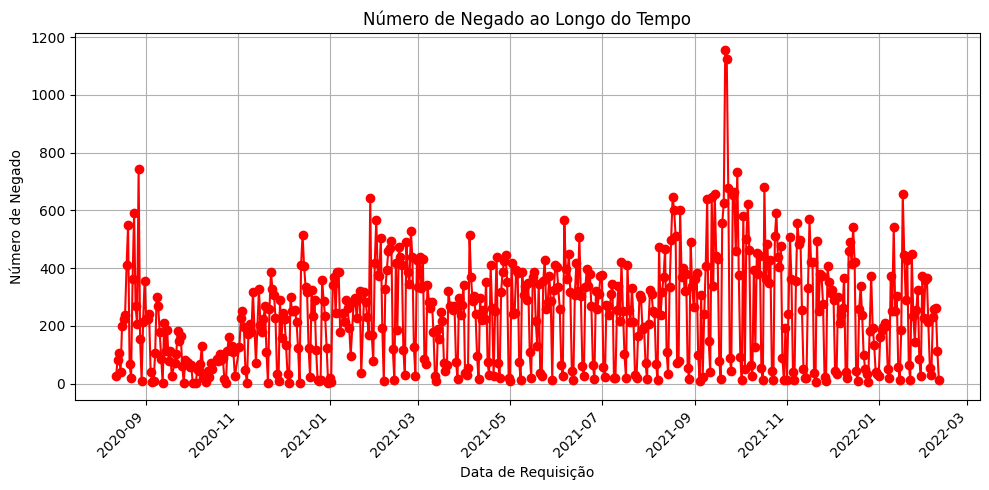

In [27]:
# Função para criar os gráficos
def plot_status(status, color):
    df_status = df[df['DS_STATUS_ITEM'] == status]
    status_counts = df_status['DATA_REQUISICAO_GREGORIANA'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    status_counts.plot(kind='line', marker='o', color=color)
    plt.xlabel('Data de Requisição')
    plt.ylabel(f'Número de {status}')
    plt.title(f'Número de {status} ao Longo do Tempo')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Criar o gráfico para "Autorizado"
plot_status('Autorizado', 'green')

# Criar o gráfico para "Negado"
plot_status('Negado', 'red')

In [28]:
condicao_negado = (df['DATA_REQUISICAO_GREGORIANA'] >= '2021-09-21') & (df['DATA_REQUISICAO_GREGORIANA'] <= '2021-09-22') & (df['DS_STATUS_ITEM'] == 'Negado')


df[condicao_negado]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM,DATA_NASCIMENTO_GREGORIANA,DATA_REQUISICAO_GREGORIANA,Idade
165,1334702,3628894,2459480,Guia de solicitac?o SP/SADT,2453699.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,40302580,"UREIA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado,2005-11-23,2021-09-21,16
224,1339612,3644815,2459481,Guia de solicitac?o de prorrogac?o de internac?o,2434265.0,1,UTI,Medico clinico,NaN,NaN,...,40304639,"TEMPO DE TROMBOPLASTINA PARCIAL ATIVADA, DETER...",HEMATOLOGIA LABORATORIAL,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado,1952-09-08,2021-09-22,69
291,1339408,3644112,2459481,Guia de solicitac?o SP/SADT,2437626.0,1,HOSPITAL,Medico otorrinolaringologista,NaN,NaN,...,20104065,CERUMEN - REMOC?O (BILATERAL),TERAPEUTICA,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,1.0,Negado,1961-11-21,2021-09-22,60
442,1340189,934808,2459481,Guia de solicitac?o internac?o,2441015.0,1,HOSPITAL,Medico cancerologista cirurgico,NaN,NaN,...,243068,TESOURA COAGULADORA CURVA P/LAPARO 36CMX5MM - UN,Instrumental,Material Hospitalar,Simpro,1.0,Negado,1971-03-03,2021-09-22,51
1340,1338925,3642849,2459481,Guia de solicitac?o de prorrogac?o de internac?o,2439959.0,1,HOSPITAL,Medico cirurgi?o cardiovascular,NaN,NaN,...,70100012,CONSULTA DE NUTRIC?O,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Negado,1968-04-11,2021-09-22,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411796,1340024,3646144,2459481,Guia de solicitac?o de prorrogac?o de internac?o,2430018.0,1,HOSPITAL,Medico endocrinologista e metabologista,NaN,NaN,...,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Negado,1941-01-22,2021-09-22,81
412017,1335328,3631582,2459480,Guia de solicitac?o SP/SADT,2458064.0,1,LABORATORIO,Medico pediatra,NaN,NaN,...,40307271,"IGE, TOTAL, DOSAGEM",IMUNOLOGIA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado,2017-11-05,2021-09-21,4
412532,1334701,3628884,2459480,Guia de solicitac?o SP/SADT,2433482.0,1,HOSPITAL,Medico clinico,NaN,NaN,...,40301990,"GAMA-GLUTAMIL TRANSFERASE, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado,1950-07-18,2021-09-21,71
412585,1340129,3646391,2459481,Guia de solicitac?o de prorrogac?o de internac?o,2430224.0,1,HOSPITAL,Medico cirurgi?o cardiovascular,NaN,NaN,...,10104011,ATENDIMENTO DO INTENSIVISTA DIARISTA (POR DIA ...,UTI,CONSULTAS,PROCED. GERAIS,3.0,Negado,1941-08-16,2021-09-22,80


In [29]:
# Suponha que df é o seu DataFrame original

# Encontrando os índices das linhas a serem removidas
indices_to_drop = df[condicao_negado].index

# Removendo as linhas do DataFrame original
df.drop(indices_to_drop, inplace=True)


In [30]:
a = df[condicao_negado]
a.loc[412017]

/tmp/ipykernel_9476/3740098554.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



KeyError: 412017

In [ ]:
# Filtrar apenas as linhas onde o status é "negado"
df_aprovado = df[df['DS_STATUS_ITEM'] == 'Autorizado']

# Contar o número de "negados" por data
negado_counts = df_aprovado['DATA_REQUISICAO_GREGORIANA'].value_counts().sort_index()

# Criar o gráfico com um tamanho maior e menos ticks no eixo x
plt.figure(figsize=(10, 5))
negado_counts.plot(kind='line', marker='o')
plt.xlabel('Data de Requisição')
plt.ylabel('Número de Aprovados')
plt.title('Número de Autorizações Aprovadas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
condicao_autorizado = (df['DATA_REQUISICAO_GREGORIANA'] >= '2021-09-01') & (df['DATA_REQUISICAO_GREGORIANA'] <= '2021-11-01') & (df['DS_STATUS_ITEM'] == 'Autorizado')


df[condicao_autorizado]
#46000 instâncias nesse intervalo.




# Modelagem🔮

# Avaliação 🔎

# Insights Finais 💡

In [ ]:
# Colocar os requisitos do codigo 🧐
# !pip freeze > requirements.txt

# AREA PARA TESTE:

In [ ]:
#procurar na coluna DS_INDICACAO_CLINICA a palavra '(NADA)'
filtered_df = df[df['DS_INDICACAO_CLINICA'].str.contains('NADA', na=False)]
# e imprimir somente a descrição dessa coluna e gerar um csv com a saida
filtered_df['DS_INDICACAO_CLINICA'].to_csv('saida.csv')



In [ ]:
#filtrar pela linha 4619 no dataset
linha_4619 = df.iloc[4619]  # Lembre-se de que o índice começa em 0, por isso usamos 4618 para obter a linha 4619.
linha_4619

In [ ]:
#filtrar na coluna DS_CARATER_ATENDIMENTO onde a caracteristica é Urgencia/Emergencia e as linhas onde a coluna DS_STATUS_ITEM é Negado
filtered_df = df[(df['DS_CARATER_ATENDIMENTO'] == 'Urgencia/Emergencia') & (df['DS_STATUS_ITEM'] == 'Negado')]
filtered_df.head(100)

In [ ]:


# Contagem de ocorrências de 'Aprovado' e 'Negado'
status_counts = df['DS_STATUS_ITEM'].value_counts()

# Criar o gráfico de barras
plt.bar(status_counts.index, status_counts.values)

# Adicionar rótulos aos eixos
plt.xlabel('Status')
plt.ylabel('Contagem')

# Adicionar título ao gráfico
plt.title('Contagem de Status: Aprovado vs. Negado')

# Mostrar o gráfico
plt.show()



In [ ]:
# Filtrar apenas as linhas onde o status é "Autorizado"
df_aprovado = df[df['DS_STATUS_ITEM'] == 'Autorizado']

# Filtrar as linhas entre as datas de interesse
start_date = '2021-09-01'
end_date = '2021-11-30'
mask = (df_aprovado['DATA_REQUISICAO_GREGORIANA'] >= start_date) & (df_aprovado['DATA_REQUISICAO_GREGORIANA'] <= end_date)
df_aprovado = df_aprovado.loc[mask]

# Contar o número de "Autorizados" por data
aprovado_counts = df_aprovado['DATA_REQUISICAO_GREGORIANA'].value_counts().sort_index()

# Criar o gráfico com um tamanho maior e menos ticks no eixo x
plt.figure(figsize=(10, 5))
aprovado_counts.plot(kind='line', marker='o')
plt.xlabel('Data de Requisição')
plt.ylabel('Número de Aprovados')
plt.title('Número de Autorizações Aprovadas ao Longo do Tempo (Setembro-Novembro 2021)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar apenas as linhas onde o status é "Autorizado"
df_aprovado = df[df['DS_STATUS_ITEM'] == 'Negado']

# Filtrar as linhas entre as datas de interesse
start_date = '2021-09-01'
end_date = '2021-11-30'
mask = (df_aprovado['DATA_REQUISICAO_GREGORIANA'] >= start_date) & (df_aprovado['DATA_REQUISICAO_GREGORIANA'] <= end_date)
df_aprovado = df_aprovado.loc[mask]

# Contar o número de "Autorizados" por data
aprovado_counts = df_aprovado['DATA_REQUISICAO_GREGORIANA'].value_counts().sort_index()

# Criar o gráfico com um tamanho maior e menos ticks no eixo x
plt.figure(figsize=(10, 5))
aprovado_counts.plot(kind='line', marker='o')
plt.xlabel('Data de Requisição')
plt.ylabel('Número de Negados')
plt.title('Número de Autorizações Negadas ao Longo do Tempo (Setembro-Novembro 2021)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar apenas as linhas onde o status é "Autorizado" ou "Negado"
df_filtrado = df[df['DS_STATUS_ITEM'].isin(['Autorizado', 'Negado'])]

# Contar o número de status por data
status_counts = df_filtrado.groupby(['DATA_REQUISICAO_GREGORIANA', 'DS_STATUS_ITEM']).size().unstack()

# Criar o gráfico com um tamanho maior e menos ticks no eixo x
plt.figure(figsize=(10, 5))
plt.plot(status_counts.index, status_counts['Autorizado'], marker='o', label='Autorizado')
plt.plot(status_counts.index, status_counts['Negado'], marker='o', label='Negado')
plt.xlabel('Data de Requisição')
plt.ylabel('Número de Itens')
plt.title('Número de Itens Autorizados e Negados ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()